## Определение перспективного тарифа для телеком-компании!
_____
### Описание исследования.

Я аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
    
_____
### Цель исследования.
    
Суть исследования:
Провести анализ данных при помощи которых коммерческий департамент сможет скорректировать рекламный бюджет, в зависимости от того, какой тариф приносит больше денег.
    
_____
### Задачи исследования.

Действия, необходимые для достижения поставленной цели:
Мне предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.
_____
### Исходные данные.
    
В моем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

#### Описание тарифов

##### Тариф `«Смарт»`
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

##### Тариф `«Ультра»`
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

##### Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

______
#### Описание данных

##### Путь к файлам:

•	`/datasets/calls.csv`.

•	`/datasets/internet.csv`.

•	`/datasets/messages.csv`.

•	`/datasets/tariffs.csv`.

•	`/datasets/users.csv`.


##### Таблица `users` (информация о пользователях):

•	`user_id` — уникальный идентификатор пользователя

•	`first_name` — имя пользователя

•	`last_name` — фамилия пользователя

•	`age` — возраст пользователя (годы)

•	`reg_date` — дата подключения тарифа (день, месяц, год)

•	`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

•	`city` — город проживания пользователя

•	`tarif` — название тарифного плана


##### Таблица `calls` (информация о звонках):

•	`id` — уникальный номер звонка

•	`call_date` — дата звонка

•	`duration` — длительность звонка в минутах

•	`user_id` — идентификатор пользователя, сделавшего звонок


##### Таблица `messages` (информация о сообщениях):

•	`id` — уникальный номер сообщения

•	`message_date` — дата сообщения

•	`user_id` — идентификатор пользователя, отправившего сообщение


##### Таблица `internet` (информация об интернет-сессиях):

•	`id` — уникальный номер сессии

•	`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)

•	`session_date` — дата интернет-сессии

•	`user_id` — идентификатор пользователя


##### Таблица `tariffs` (информация о тарифах):

•	`tariff_name` — название тарифа

•	`rub_monthly_fee` — ежемесячная абонентская плата в рублях

•	`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату

•	`messages_included` — количество сообщений в месяц, включённых в абонентскую плату

•	`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

•	`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

•	`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета

•	`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

______

## Изучение данных из файла

Импортируем библиотеку `Pandas`:

In [73]:
import pandas as pd

### Чтение файлов

#### Файл `calls.csv`

In [74]:
df_calls = pd.read_csv('/datasets/calls.csv')   # Прочитаем файл calls.csv из папки /datasets
                                                # и сохраним его в переменной df_calls
display(df_calls) # Выводим на экран первые десять строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [75]:
df_calls.info() # Получаем общую информацию о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [76]:
df_calls.isna().sum() # подсчитаем количество пропущенных значений в таблице

id           0
call_date    0
duration     0
user_id      0
dtype: int64

**Описание таблицы**

В таблице 4 столбца и 202607 строк. Тип данных в столбцах — `float`, `int`, `object`. Пропущенные значения отсутствуют. Столбцы `'id'` и `'call_date'` имеют строковый тип данных (в предобработке необходимо привести их к типу `int` и `DateTime`). Столбец `'duration'` содержит нулевые значения.

#### Файл `internet.csv`

In [77]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)   # Прочитаем файл internet.csv из папки /datasets
                                                                   # и сохраним его в переменной df_internet
display(df_internet) # Выводим на экран первые десять строк таблицы

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [78]:
df_internet.info() # Получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [79]:
df_internet.isna().sum() # подсчитаем количество пропущенных значений в таблице

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

**Описание таблицы**

В таблице 4 столбца и 149396 строк. Тип данных в столбцах — `float`, `int`, `object`. Пропущенные значения отсутствуют. Столбцы `'id'` и `'session_date'` имеют строковый тип данных (в предобработке необходимо привести их к типу `int` и `DateTime`).

#### Файл `messages.csv`

In [80]:
df_messages = pd.read_csv('/datasets/messages.csv')   # Прочитаем файл messages.csv из папки /datasets
                                                      # и сохраним его в переменной df_messages
display(df_messages) # Выводим на экран первые десять строк таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [81]:
df_messages.info() # Получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [82]:
df_messages.isna().sum() # подсчитаем количество пропущенных значений в таблице

id              0
message_date    0
user_id         0
dtype: int64

**Описание таблицы**

В таблице 3 столбца и 123036 строк. Тип данных в столбцах — `float`, `int`, `object`. Пропущенные значения отсутствуют. Столбцы `'id'` и `'message_date'` имеют строковый тип данных (в предобработке необходимо привести их к типу `int` и `DateTime`).

#### Файл `tariffs.csv`

In [83]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')   # Прочитаем файл tariffs.csv из папки /datasets
                                                    # и сохраним его в переменной df_tariffs
display(df_tariffs) # Выводим на экран первые десять строк таблицы

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [84]:
df_tariffs.info() # Получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [85]:
df_tariffs.isna().sum() # подсчитаем количество пропущенных значений в таблице

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

**Описание таблицы**

В таблице 8 столбцов и 2 строки. Тип данных в столбцах — `int`, `object`. Пропущенные значения отсутствуют.

#### Файл `users.csv`

In [86]:
df_users = pd.read_csv('/datasets/users.csv')   # Прочитаем файл users.csv из папки /datasets
                                                # и сохраним его в переменной df_users
display(df_users) # Выводим на экран первые десять строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [87]:
df_users.info() # Получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [88]:
df_users.isna().sum() # подсчитаем количество пропущенных значений в таблице

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

**Описание таблицы**

В таблице 8 столбцов и 500 строк. Тип данных в столбцах — `int`, `object`. Обнаружено 462 пропущенных значения, но из описания данных нам известно, что: `'churn_date'` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Столбцы `'churn_date'` и `'reg_date'` имеют строковый тип данных (в предобработке необходимо привести их к типу `DateTime`).

## Предобработка данных

### Обработка дубликатов

#### Обработка неявных дубликатов

По предварительному анализу мы заметили что в столбце `'duration'` датафрейма `'df_calls'` имеются нулевые значения.

Проверим наличие неявных дубликатов в столбце `'duration'` методом `unique()` через просмотр уникальных значений, а также выведем числовые характеристики столбца:

In [89]:
print(df_calls['duration'].unique()) # выведем список уникальных значений

[ 0.    2.85 13.8  ... 24.36 24.5  26.9 ]


In [90]:
print(df_calls['duration'].describe())

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


Как видим данные действительно содержат нулевые значения, но обратившись к описанию данных по заданию выяснилось, что звонки с нулевой продолжительностью это не ошибка, так как нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

#### Обработка явных дубликатов

Посчитаем явные дубликаты в таблицах:

In [91]:
print("Количество явных дубликатов в датасете 'df_calls': {}".format(df_calls.duplicated().sum()))
print("Количество явных дубликатов в датасете 'df_internet': {}".format(df_internet.duplicated().sum()))
print("Количество явных дубликатов в датасете 'df_messages': {}".format(df_messages.duplicated().sum()))
print("Количество явных дубликатов в датасете 'df_tariffs': {}".format(df_tariffs.duplicated().sum()))
print("Количество явных дубликатов в датасете 'df_users': {}".format(df_users.duplicated().sum()))

Количество явных дубликатов в датасете 'df_calls': 0
Количество явных дубликатов в датасете 'df_internet': 0
Количество явных дубликатов в датасете 'df_messages': 0
Количество явных дубликатов в датасете 'df_tariffs': 0
Количество явных дубликатов в датасете 'df_users': 0


Явные дубликаты в таблицах отсутствуют.

### Обработка типов значений

#### Приведение данных к целочисленному типу

По предварительному анализу мы заметили что данные в столбцах `'id'` датафреймов `'df_calls'`, `'df_internet'` и `'df_messages'`  имеют строковый тип данных, поэтому приведем их к типу `int`.

In [92]:
df_calls['id'] = df_calls['id'].astype('int')
df_internet['id'] = df_internet['id'].astype('int')
df_messages['id'] = df_messages['id'].astype('int')

In [93]:
print("Новый тип данных в столбце 'id' в датасете 'df_calls': {}".format(df_calls['id'].dtypes))
print("Новый тип данных в столбце 'id' в датасете 'df_internet': {}".format(df_internet['id'].dtypes))
print("Новый тип данных в столбце 'id' в датасете 'df_messages': {}".format(df_messages['id'].dtypes))

Новый тип данных в столбце 'id' в датасете 'df_calls': int64
Новый тип данных в столбце 'id' в датасете 'df_internet': int64
Новый тип данных в столбце 'id' в датасете 'df_messages': int64


Изменение типа данных прошло удачно!

#### Приведение данных к формату DateTime

По предварительному анализу мы заметили что данные в столбцах `'call_date'`, `'session_date'`, `'message_date'`, `'churn_date'` и `'reg_date'` датафреймов `'df_calls'`, `'df_internet'`, `'df_messages'` и `'df_users'`  имеют строковый тип данных, поэтому приведем их к типу `DateTime`.

In [94]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format="%Y-%m-%d")
print("Новый тип данных в столбце 'call_date' в датасете 'df_calls': {}".format(df_calls['call_date'].dtypes))

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format="%Y-%m-%d")
print("Новый тип данных в столбце 'session_date' в датасете 'df_internet': {}".format(df_internet['session_date'].dtypes))

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format="%Y-%m-%d")
print("Новый тип данных в столбце 'message_date' в датасете 'df_messages': {}".format(df_messages['message_date'].dtypes))

df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format="%Y-%m-%d")
print("Новый тип данных в столбце 'churn_date' в датасете 'df_users': {}".format(df_users['churn_date'].dtypes))

df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format="%Y-%m-%d")
print("Новый тип данных в столбце 'reg_date' в датасете 'df_users': {}".format(df_users['reg_date'].dtypes))

Новый тип данных в столбце 'call_date' в датасете 'df_calls': datetime64[ns]
Новый тип данных в столбце 'session_date' в датасете 'df_internet': datetime64[ns]
Новый тип данных в столбце 'message_date' в датасете 'df_messages': datetime64[ns]
Новый тип данных в столбце 'churn_date' в датасете 'df_users': datetime64[ns]
Новый тип данных в столбце 'reg_date' в датасете 'df_users': datetime64[ns]


Изменение типа данных завершилось удачно!

## Подготовка данных

### Расчеты значений для каждого пользователя

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Для подсчета количества сделанных звонков и израсходованных минут разговора по месяцам нам необходимо в датасете `'df_calls'` добавить столбец `'month'` и заполнить его номерами месяцев.

In [95]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month # создаем новый столбец и заполняем его номером месяца
print(df_calls['month'].unique()) # для проверки выводим список уникальных значений нового столбца

[ 7  8  6  9 12 11 10  5  3  4  1  2]


In [96]:
display(df_calls.head()) # выведем первые пять строк таблицы для удобства

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0.00,1000,7
1,10001,2018-08-17,0.00,1000,8
2,10002,2018-06-11,2.85,1000,6
3,10003,2018-09-21,13.80,1000,9
4,10004,2018-12-15,5.18,1000,12


Так как в примечании к заданию у нас указано то, что `«Мегалайн»` всегда округляет секунды до минут (каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута) перед группировкой необходимо округлить значения столбца `'duration'` до целых минут. Для этого нам потребуется библиотека `Math`, импортируем ее:

In [97]:
import math # импортируем библиотеку Math для округления значений

In [98]:
# округляем значения столбца 'duration' до целого вверх
df_calls['duration'] = df_calls[df_calls['duration'] != 0].apply(lambda x: math.ceil(x['duration']), axis=1)

# после округления у нас вместо нулей появились в столбце пропуски (nan), поэтому заменим их на "0"
df_calls['duration'] = df_calls['duration'].fillna(0)

# также изменим вещественный тип данных на целочисленный
df_calls['duration'] = df_calls['duration'].astype('int')

In [99]:
# для проверки выводим список уникальных значений столбца
print(df_calls['duration'].unique())

[ 0  3 14  6 19  8 10  5 13 16  9  2 15 11 24 12 23  7 20  1  4 17 21 18
 25 22 27 26 29 28 30 37 31 33 34 32 36 35 38]


Создадим сводную таблицу с расчетами значений количества сделанных звонков и израсходованных минут разговора по месяцам:

In [100]:
number_calls = (df_calls.groupby(['user_id', 'month']) # делаем срез данных по нужным для расчета столбцам 
                  .agg({'duration':'sum', 'id':'count'}) # применяем к столбцам функции подсчета требуемых значений 
                  .reset_index() # обновляем индексацию
                  .rename(columns={'duration':'minutes_per_month','id':'calls_per_month'})) # переименовываем столбцы

display(number_calls.head()) # выводим на экран первые 5 строк сводной таблицы с расчитанными данными

,user_id,month,minutes_per_month,calls_per_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


Сводная таблица с расчетами значений количества сделанных звонков и израсходованных минут разговора по месяцам готова!

#### Количество отправленных сообщений по месяцам

Для подсчета количества отправленных сообщений по месяцам нам необходимо в датасете `'df_messages'` добавить столбец `'month'` и заполнить его номерами месяцев.

In [101]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month # создаем новый столбец и  
                                                                           # заполняем его номером месяца
print(df_messages['month'].unique()) # для проверки выводим список уникальных значений нового столбца

[ 6 10  8 12 11  5  7  9  3  4  2  1]


In [102]:
display(df_messages.head()) # выведем первые пять строк таблицы для удобства

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


Создадим сводную таблицу с расчетами значений количества отправленных сообщений по месяцам:

In [103]:
number_messages = (df_messages.groupby(['user_id', 'month']) # делаем срез данных по нужным для расчета столбцам 
                        .agg({'id':'count'}) # применяем к столбцам функции подсчета требуемых значений
                        .reset_index() # обновляем индексацию
                        .rename(columns={'id':'messages_per_month'})) # переименовываем столбцы

display(number_messages.head()) # выводим на экран первые 5 строк сводной таблицы с расчитанными данными

,user_id,month,messages_per_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Сводная таблица с расчетами значений количества отправленных сообщений по месяцам готова!

#### Объем израсходованного интернет-трафика по месяцам

Для подсчета объема израсходованного интернет-трафика по месяцам нам необходимо в датасете `'df_internet'` добавить столбец `'month'` и заполнить его номерами месяцев.

In [104]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month # создаем новый столбец и  
                                                                           # заполняем его номером месяца
print(df_internet['month'].unique()) # для проверки выводим список уникальных значений нового столбца

[11  9  6  8 10  7 12  5  2  3  4  1]


In [105]:
display(df_internet.head()) # выведем первые пять строк таблицы для удобства

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,11
1,10001,1052.81,2018-09-07,1000,9
2,10002,1197.26,2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


Так как в примечании к заданию у нас указано то, что для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Следовательно переведем мегабайты в гигабайты, сгруппируем данные по месяцам, посчитаем общий трафик в месяц и округлим вверх до целых гигабайтов:

In [106]:
# переведем мегабайты в гигабайты и запишем их в новый столбец 'gb_used'
df_internet['gb_used'] = df_internet['mb_used'] / 1024

# выведем первые пять строк на экран
display(df_internet.head())

,id,mb_used,session_date,user_id,month,gb_used
0,10000,112.95,2018-11-25,1000,11,0.110303
1,10001,1052.81,2018-09-07,1000,9,1.028135
2,10002,1197.26,2018-06-25,1000,6,1.169199
3,10003,550.27,2018-08-22,1000,8,0.537373
4,10004,302.56,2018-09-24,1000,9,0.295469


Создадим сводную таблицу с расчетами значений объема израсходованного интернет-трафика по месяцам:

In [107]:
volume_internet = (df_internet.groupby(['user_id', 'month']) # делаем срез данных по нужным для расчета столбцам 
                        .agg({'gb_used':'sum'}) # применяем к столбцу функцию подсчета требуемых значений
                        .reset_index() # обновляем индексацию
                        .rename(columns={'gb_used':'internet_traffic_volume'})) # переименовываем столбец

display(volume_internet.head()) # выводим на экран первые 5 строк сводной таблицы с расчитанными данными

,user_id,month,internet_traffic_volume
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451


In [108]:
# округляем значения столбца 'gb_used' до целого вверх
volume_internet['internet_traffic_volume'] = (volume_internet[volume_internet['internet_traffic_volume'] != 0]
                                            .apply(lambda x: math.ceil(x['internet_traffic_volume']), axis=1))

# после округления у нас вместо нулей появились в столбце пропуски (nan), поэтому заменим их на "0"
volume_internet['internet_traffic_volume'] = volume_internet['internet_traffic_volume'].fillna(0)

# также изменим вещественный тип данных на целочисленный
volume_internet['internet_traffic_volume'] = volume_internet['internet_traffic_volume'].astype('int')

# выведем первые пять строк на экран
display(volume_internet.head())

,user_id,month,internet_traffic_volume
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


In [109]:
# посмотрим на список уникальных значений интернет-трафика в Гб
print(volume_internet['internet_traffic_volume'].unique())

[ 3 23 14 15 10 18 11 20 17 19  9 13 12 22 28 16  8  7  2 21 25 24  6 26
 29  1 27  5  4 43 36 37 35 30 31  0 49 39 33 34 32 38 42 40 41 48 45 44]


Так же для дальнейшего использования и облегчения расчетов нам потребуется перевести объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) в датасете `df_tariffs` в столбце `mb_per_month_included` в гигабайты. Для этого создадим новый столбец `gb_per_month_included` и запишем в него гигабайты:

In [110]:
# переведем мегабайты в гигабайты и запишем их в новый столбец 'gb_per_month_included'
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024

# также изменим вещественный тип данных на целочисленный
df_tariffs['gb_per_month_included'] = df_tariffs['gb_per_month_included'].astype('int')   
    
# посмотрим на список уникальных значений в Гб
print(df_tariffs['gb_per_month_included'].unique())

[15 30]


#### Помесячная выручка с каждого пользователя

Для подсчета помесячной выручки с каждого пользователя нам необходимо последовательно собрать все необходимые данные в один датасет. Для этого используем метод `merge()`:

In [111]:
# Соединим последовательно все датасеты в один общий "df_proceeds"
df_proceeds = number_calls.merge(number_messages, on=['user_id','month'], how='outer')
df_proceeds = df_proceeds.merge(volume_internet, on=['user_id','month'], how='outer')
df_proceeds = df_proceeds.merge(df_users, on=['user_id'], how='left')

В процессе объединения датасетов выяснилось, что в датасете `'df_tariffs'` для объединения необходимо переименование столбца `tariff_name` на `tariff`, поэтому выполним переименование и продолжим:

In [112]:
display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


In [113]:
# переименуем столбец 'tariff_name' датасета "df_tariffs" на 'tariff'
df_tariffs = df_tariffs.rename(columns={'tariff_name' : 'tariff'})
# проверим изменилось ли название столбца
print(df_tariffs.columns)

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff', 'gb_per_month_included'],
      dtype='object')


Как видим, название столбца `tariff_name` поменялось на `tariff`, а значит можно продолжить соединение датафреймов:

In [114]:
df_proceeds = df_proceeds.merge(df_tariffs, on='tariff', how='left')

In [115]:
# Посмотрим какая получилась общая таблица "df_proceeds" (первые пять строк)
display(df_proceeds.head())

,user_id,month,minutes_per_month,calls_per_month,messages_per_month,internet_traffic_volume,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,22.0,3.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
1,1000,6,172.0,43.0,60.0,23.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
2,1000,7,340.0,47.0,75.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
3,1000,8,408.0,52.0,81.0,14.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
4,1000,9,466.0,58.0,57.0,15.0,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30


Проверим новую таблицу на предмет пропусков:

In [116]:
df_proceeds.isna().sum()

user_id                       0
month                         0
minutes_per_month            40
calls_per_month              40
messages_per_month          497
internet_traffic_volume      11
age                           0
churn_date                 3027
city                          0
first_name                    0
last_name                     0
reg_date                      0
tariff                        0
messages_included             0
mb_per_month_included         0
minutes_included              0
rub_monthly_fee               0
rub_per_gb                    0
rub_per_message               0
rub_per_minute                0
gb_per_month_included         0
dtype: int64

Как видим в новом датафрейме появились пропуски, и они вероятнее всего образовались по причине того, что потребитель не пользовался интернет-трафиком и не отправлял смс. Поэтому заменим данные пропуски нулями.

In [117]:
# создаем список столбцов для замены пропусков
list_pass = ['minutes_per_month', 'calls_per_month', 'messages_per_month', 'internet_traffic_volume']

# для замены пустых значений используем метод "fillna()"
for i in list_pass: # циклом проходим по каждому значению из списка
    df_proceeds[i] = df_proceeds[i].fillna(0) # заменяем пропуски на "0"

# проверяем произошла ли замена
for i in list_pass: # проходимся по циклу и выводим на печать
    print(f'Количество пропусков в столбце "{i}":', df_proceeds[i].isna().sum())

Количество пропусков в столбце "minutes_per_month": 0
Количество пропусков в столбце "calls_per_month": 0
Количество пропусков в столбце "messages_per_month": 0
Количество пропусков в столбце "internet_traffic_volume": 0


Проверим наличие дубликатов в новом датасете:

In [118]:
print(f'Количество дубликатов в датасете "df_proceeds":', df_proceeds.duplicated().sum())

Количество дубликатов в датасете "df_proceeds": 0


Как сказано в задании помесячную выручку с каждого пользователя нужно посчитать путем вычета бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану. Для этого напишем функцию:

In [119]:
def tariff_function(row):
    '''
    Функция вычитает бесплатный лимит, включенный в абонентскую плату из суммарного количества звонков, 
    сообщений и интернет-трафика и остаток умножает на значение из тарифного плана.
    Возвращает сумму всех значений при условии, что они больше "0".
    '''
    # высчитываем стоимость сообщений
    messages = (row['messages_per_month'] - row['messages_included']) * row['rub_per_message']
    # высчитываем стоимость минут
    minutes = (row['minutes_per_month'] - row['minutes_included']) * row['rub_per_minute']
    # высчитываем стоимость интернет-трафика
    gigabites = (row['internet_traffic_volume'] - row['gb_per_month_included']) * row['rub_per_gb']
    
    final = 0 # создаем переменную для подсчета итогового значения
    
    for i in [messages, minutes, gigabites]: # проходимся циклом по значениям
        if i > 0: # если условие верно, то итоговое значение увеличивается
            final += i
    return final # возвращаем итоговое значение, т.е. сумму всех итерируемых значений

Создаем в датасете `"df_proceeds"` новый столбец `'final_sum'` и применяем к нему нашу функцию через выражение лямбда-функции:

In [120]:
df_proceeds['final_sum'] = df_proceeds.apply(lambda x: tariff_function(x), axis=1)

# результат применения функции проверим путем вывода числовых характеристик нового столбца
df_proceeds['final_sum'].describe()

count    3214.000000
mean      550.015868
std       767.771509
min         0.000000
25%         0.000000
50%       163.500000
75%       938.000000
max      6220.000000
Name: final_sum, dtype: float64

Ну, и, наконец посчитаем помесячную выручку с каждого пользователя. Для этого прибавим к посчитанным значениям столбца `'final_sum'` абонентскую плату, соответствующую тарифному плану в столбце `'rub_monthly_fee'` и запишем ее в новый столбец `'proceeds'`:

In [121]:
df_proceeds['proceeds'] = df_proceeds['final_sum'] + df_proceeds['rub_monthly_fee']

# результат вычисления проверим путем вывода числовых характеристик нового столбца
df_proceeds['proceeds'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: proceeds, dtype: float64

**Вывод**

Мы посчитали и добавили в датасет помесячную выручку с каждого пользователя путем вычета бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика, а остаток умножили на значение из тарифного плана, затем прибавили абонентскую плату, соответствующую тарифному плану. Теперь можно приступать к анализу данных.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

### Описание поведения клиента на основе полученной выборки

In [122]:
# посчитаем какое количество потребителей пользуется разными тарифами
df_proceeds.pivot_table(index='tariff', values=['user_id'], aggfunc='count')

,user_id
tariff,
smart,2229
ultra,985


Как видно из наших расчетов и сводных таблиц больше людей пользуются тарифом `smart`.

In [123]:
# посчитаем на каком тарифе больше используются сообщения, минуты, трафик и посмотрим на общую выручку
df_proceeds.pivot_table(index='tariff', values=['messages_per_month',
                                                'minutes_per_month',
                                                'internet_traffic_volume',
                                                'proceeds'], aggfunc='sum')

,internet_traffic_volume,messages_per_month,minutes_per_month,proceeds
tariff,,,,
smart,36397.0,74413.0,931577.0,2875351.0
ultra,19202.0,48623.0,518724.0,2039100.0


**Вывод**

На тарифе `smart` больше проходит трафика, отправляется сообщений и больше проходит звонков. По выручке тоже можно сказать, что по тарифу `smart` она выше хоть и абонентская плата по тарифу `ultra` в несколько раз больше.

### Построение гистограмм и подсчет значений

#### Гистограммы и значения для каждого тарифа по выручке

In [124]:
# импортируем библиотеку "matplotlib" для работы с графиками
import matplotlib.pyplot as plt

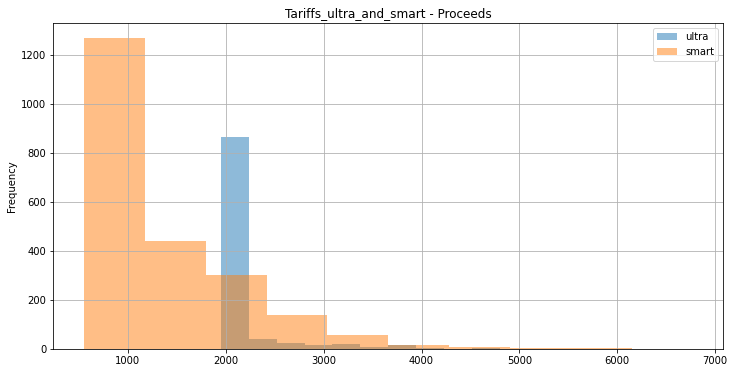

In [125]:
# построим гистограммы для тарифов 'ultra' и 'smart' по выручке
plt.figure(figsize=(12, 6))
(df_proceeds[df_proceeds['tariff'] == 'ultra']['proceeds']
     .plot(kind='hist', bins=10, grid=True, label = 'ultra', alpha=0.5))
(df_proceeds[df_proceeds['tariff'] == 'smart']['proceeds']
     .plot(kind='hist', bins=10, grid=True, label = 'smart', alpha=0.5))
plt.legend()
plt.title('Tariffs_ultra_and_smart - Proceeds')
plt.show()

In [126]:
# Посчитаем медиану, среднее количество, дисперсию и стандартное отклонение
(df_proceeds.groupby('tariff')
  .agg({'proceeds':['median','mean','var','std']}))

proceeds                                        
         median         mean            var         std
tariff                                                 
smart    1023.0  1289.973531  669785.708006  818.404367
ultra    1950.0  2070.152284  141516.745079  376.187114

**Вывод**

Как видим, по тарифу `'ultra'` в основном платят по тарифу, но есть небольшое количество потребителей которые платят сверх тарифа. У тарифа `'smart'` потребители выходят за абонентскую плату намного чаще.

#### Гистограммы и значения для каждого тарифа по минутам

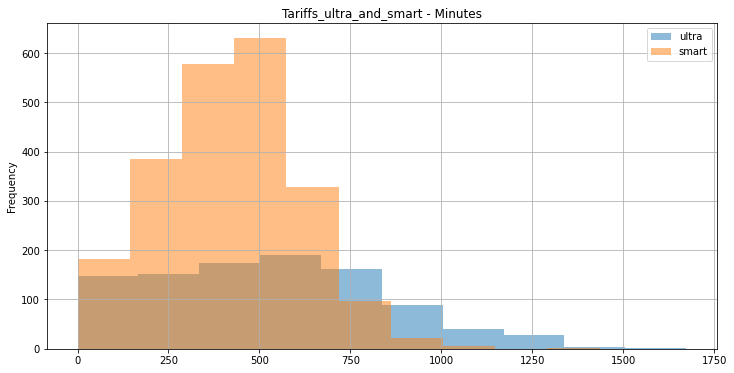

In [127]:
# построим гистограммы для тарифов 'ultra' и 'smart' по количеству минут в месяц
plt.figure(figsize=(12, 6))
(df_proceeds[df_proceeds['tariff'] == 'ultra']['minutes_per_month']
     .plot(kind='hist', bins=10, grid=True, label = 'ultra', alpha=0.5))
(df_proceeds[df_proceeds['tariff'] == 'smart']['minutes_per_month']
     .plot(kind='hist', bins=10, grid=True, label = 'smart', alpha=0.5))
plt.legend()
plt.title('Tariffs_ultra_and_smart - Minutes')
plt.show()

In [128]:
# Посчитаем медиану, среднее количество, дисперсию и стандартное отклонение
(df_proceeds.groupby('tariff')
  .agg({'minutes_per_month':['median','mean','var','std']}))

minutes_per_month                                       
                  median        mean            var         std
tariff                                                         
smart              422.0  417.934948   36219.315784  190.313730
ultra              518.0  526.623350  100873.633397  317.606098

**Вывод**

На тарифе `smart` потребители говорят около 420 минут в месяц, а на тарифе `ultra` 520 минут в месяц. А также на тарифе `ultra` у потребителей еще остается некоторое количество минут. Среднее и медиана отличаются незначительно.

#### Гистограммы и значения для каждого тарифа по трафику

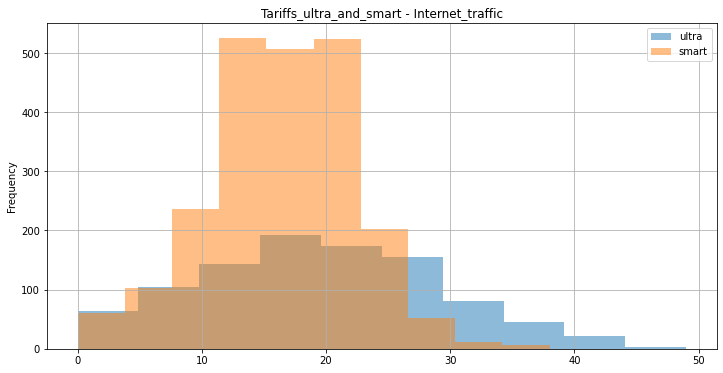

In [129]:
# построим гистограммы для тарифов 'ultra' и 'smart' по количеству интернет-трафика в месяц
plt.figure(figsize=(12, 6))
(df_proceeds[df_proceeds['tariff'] == 'ultra']['internet_traffic_volume']
     .plot(kind='hist', bins=10, grid=True, label = 'ultra', alpha=0.5))
(df_proceeds[df_proceeds['tariff'] == 'smart']['internet_traffic_volume']
     .plot(kind='hist', bins=10, grid=True, label = 'smart', alpha=0.5))
plt.legend()
plt.title('Tariffs_ultra_and_smart - Internet_traffic')
plt.show()

In [130]:
# Посчитаем медиану, среднее количество, дисперсию и стандартное отклонение
(df_proceeds.groupby('tariff')
  .agg({'internet_traffic_volume':['median','mean','var','std']}))

internet_traffic_volume                                
                        median       mean        var       std
tariff                                                        
smart                     17.0  16.328847  33.028705  5.747061
ultra                     19.0  19.494416  97.091686  9.853511

**Вывод**

На тарифе `smart` потребители выходят за пределы тарифа больше, а на тарифе `ultra` остается неиспользованный трафик. Среднее и медиана отличаются незначительно.

#### Гистограммы и значения для каждого тарифа по сообщениям

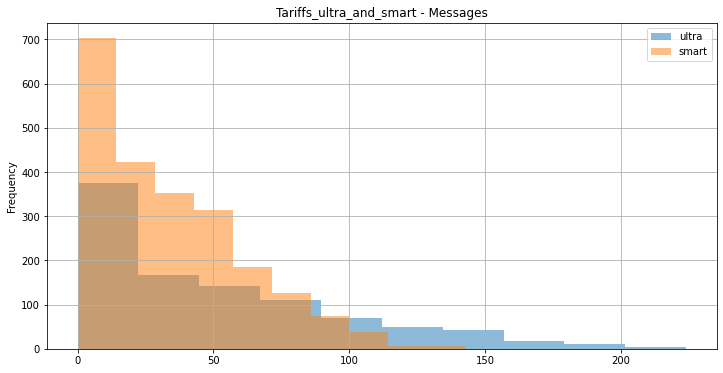

In [131]:
# построим гистограммы для тарифов 'ultra' и 'smart' по количеству количеству сообщений в месяц
plt.figure(figsize=(12, 6))
(df_proceeds[df_proceeds['tariff'] == 'ultra']['messages_per_month']
     .plot(kind='hist', bins=10, grid=True, label = 'ultra', alpha=0.5))
(df_proceeds[df_proceeds['tariff'] == 'smart']['messages_per_month']
     .plot(kind='hist', bins=10, grid=True, label = 'smart', alpha=0.5))
plt.legend()
plt.title('Tariffs_ultra_and_smart - Messages')
plt.show()

In [132]:
# Посчитаем медиану, среднее количество, дисперсию и стандартное отклонение
(df_proceeds.groupby('tariff')
  .agg({'messages_per_month':['median','mean','var','std']}))

messages_per_month                                   
                   median       mean          var        std
tariff                                                      
smart                28.0  33.384029   796.812958  28.227876
ultra                38.0  49.363452  2285.266143  47.804457

**Вывод**

Как видно по гистограммам и сводной таблицы большая часть потребителей на каждом тарифе практически не отправляет сообщения.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

`H0 (нулевая гипотеза)` - предположение о том, что между данными связи нет (средняя выручка пользователей тарифа Смарт не отличается от средней выручки пользователей тарифа Ультра).

`H1 (альтернативная гипотеза)` - средняя выручка пользователей тарифа Смарт отличается от средней выручки пользователей тарифа Ультра.

В нашем случае сравниваемые выборки независимые, поэтому можно использовать t-критерий Стьюдента.

In [133]:
# Напишем функцию для удаления выбросов
def outlier_removal(data, column):
    '''
    Функция удаляет определяемые условием выбросы в определенном датасете по определенному столбцу.
        - data - определенный датасет;
        - column - столбец в датасете.
    '''
    q1 = data[column].quantile(0.25) # первый квартиль                
    q3 = data[column].quantile(0.75) # третий квартиль
    iqr = q3 - q1 # межквартильный размах
    iqr_test = (data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr)) # определяем требуемые условия
    return data.loc[iqr_test]

Сформируем для проверки гипотез два датасета по срезу тарифов:

In [134]:
tarif_ultra = df_proceeds[df_proceeds['tariff'] == 'ultra'] # датасет по тарифу 'ultra'
tarif_smart = df_proceeds[df_proceeds['tariff'] == 'smart'] # датасет по тарифу 'smart'

Применим функцию удаления выбросов к новым датасетам:

In [135]:
# применяем функцию к датасету тарифа "ultra"
tarif_ultra = outlier_removal(tarif_ultra, 'proceeds')
tarif_ultra = tarif_ultra['proceeds']

# применяем функцию к датасету тарифа "smart"
tarif_smart = outlier_removal(tarif_smart, 'proceeds')
tarif_smart = tarif_smart['proceeds']

Пороговое значение `alpha` зададим 0.05:

In [136]:
alpha = 0.05 # критический уровень статистической значимости

Чтобы проверить нашу гипотезу о равенстве среднего двух генеральных совокупностей по взятым нами выборкам, применим метод `scipy.stats.ttest_ind`, но для этого необходимо подключить библиотеку `scipy`:

In [137]:
from scipy import stats as st # подключаем библиотеку "scipy" и импортируем из нее модуль "stats" в переменную "st"

In [138]:
results = st.ttest_ind(tarif_ultra, tarif_smart) # применяем метод "scipy.stats.ttest_ind" к нашим выборкам

print('p-значение:', results.pvalue) # выводим p-value из результата

if (results.pvalue < alpha): # сравниваем полученный и критический уровни значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.199325734910118e-155
Отвергаем нулевую гипотезу


/tmp/ipykernel_93/906305427.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = st.ttest_ind(tarif_ultra, tarif_smart) # применяем метод "scipy.stats.ttest_ind" к нашим выборкам


Мы определили, что присутствуют значимые различия между нашими выборками.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

`H0 (нулевая гипотеза)` - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

`H1 (альтернативная гипотеза)` - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки гипотез необходимо создать два датасета (один для Москвы, а второй для других регионов). Проставим признак по каждой строке - Москва или регион, но сначала необходимо проверить список уникальных значений по столбцу `city`, для подстраховки:

In [139]:
print(df_proceeds['city'].unique()) # выводим список уникальных значений по столбцу 'city'

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск' 'Липецк'
 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Волжский' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


Как видим Москва встречается в единственном экземпляре, а значит можно проставить признаки по каждой строке Москва или регион с использованием метода `np.where()`, но для этого необходимо подключить библиотеку `numpy`:

In [140]:
import numpy as np # импортируем библиотеку "numpy"

In [141]:
df_proceeds['regions'] = np.where(df_proceeds['city'] == 'Москва', 'Москва', 'Регион') # проставляем признаки в новый столбец
print(df_proceeds['regions'].unique()) # проверяем уникальные значения в новом столбце

['Регион' 'Москва']


Создаем две выборки по Москве и регионам:

In [142]:
moscow = df_proceeds[df_proceeds['regions'] == 'Москва'] # выборка по Москве
regions = df_proceeds[df_proceeds['regions'] == 'Регион'] # выборка по другим регионам

Применим функцию удаления выбросов к новым датасетам:

In [143]:
# применяем функцию к датасету по Москве
moscow = outlier_removal(moscow, 'proceeds')
moscow = moscow['proceeds']

# применяем функцию к датасету по другим регионам
regions = outlier_removal(regions, 'proceeds')
regions = regions['proceeds']

Критический уровень статистической значимости `alpha` оставляем равным 0.05 и применим метод `scipy.stats.ttest_ind`:

In [144]:
results = st.ttest_ind(moscow, regions) # применяем метод "scipy.stats.ttest_ind" к нашим выборкам

print('p-значение:', results.pvalue) # выводим p-value из результата

if (results.pvalue < alpha): # сравниваем полученный и критический уровни значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29404256281786195
Не получилось отвергнуть нулевую гипотезу


Как видим мы получили вероятность порядка 30%, что результат может быть получен совершенно случайно и из этого следует, что значимых различий нет. Нулевую гипотезу отвергнуть не получается. Таким образом, верно утверждение, что средняя выручка потребителей из Москвы не отличается от выручки потребителей из других регионов.

## Общий вывод

Как видно из наших расчетов и сводных таблиц больше потребителей пользуются тарифом `Смарт`, а также на этом тарифе больше проходит трафика, отправляется сообщений и больше проходит звонков. По выручке тоже можно сказать, что по тарифу `Смарт` (выручка составляет порядка 60%) она выше хоть и абонентская плата по тарифу `Ультра` в несколько раз больше.

Количество потребителей на тарифе `Смарт` составляет 2229 пользователей, а на тарифе `Ультра` всего 985 пользователей.

На тарифе `Смарт` потребители говорят около 420 минут в месяц, а на тарифе `Ультра` 520 минут в месяц. А также на тарифе `Ультра` у потребителей еще остается некоторое количество минут.

На тарифе `Смарт` потребители выходят за пределы тарифа больше, а на тарифе `Ультра` остается неиспользованный трафик.

Выяснилось, что средняя выручка потребителей из Москвы не отличается от выручки потребителей из других регионов.